# 02] Regresión Lineal Múltiple
    - Un modelo de regresión que contempla a dos o más variables predictoras es llamado un modelo de regresión
    múltiple. Por ejemplo:
        
        y = b_0 + b_1*x1 + b_2*x2 + b_k*xk + e
        
        Observe que:
        - b_j (j>0) representa el cambio esperado en y cuando se incrementa xk en una unidad, manteniendo el 
        resto de los regresores constantes.
        - Se asume E(e)=0, por lo que E(Y | x1,...,xk) = b_0 + sum[j=1 to k](b_j*xk)
        - Estos modelos son llamados empíricos y buscan aproximar la relación entre y la colección de 
        regresores, dentro de un rango específico de éstos.
        
    - El modelo se llama lineal por el orden de los coeficientes, no de los regresores, por lo que si se tiene 
    un modelo como: E(y) = b_1*x1 + b_2*x1^2, se puede reescribir como E(y) = b_1*x1 + b_2*x2.
    
    - Del mismo modo, términos de interacción pueden ser modelados como x3 = x1*x2. Una interpretación de 
    las interacciones es que un cambio de una unidad en x1 puede tener mayor o menor impacto en E(y) 
    dependiendo del valor de x2.

In [70]:
# Used libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f
from scipy.stats import t
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 2.1] Definir datos - T3S1E1
    - Los datos son provistos por el profesor en la Tarea 3. Sección 1, Ejercicio 1.

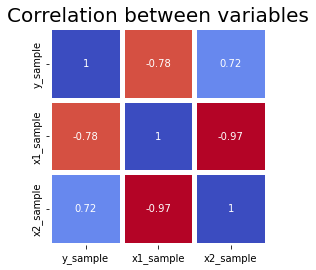

In [71]:
# Regression auxiliary data
n = 11
k = 2
p = k+1

# Define sampled values
y_sample = np.array([6, 8, 1, 0, 5, 3, 2, -4, 10, -3, 5])
x1_sample = np.array([1, 4, 9, 11, 3, 8, 5, 10, 2, 7, 6])
x2_sample = np.array([8, 2, -8, -10, 6, -6, 0, -12, 4, -2, -4])

# Define dataframe with sample data
df_data = pd.DataFrame({"y_sample": y_sample, "x1_sample": x1_sample, "x2_sample": x2_sample})

# Plot correlation matrix
sns.heatmap(df_data.corr(), cmap="coolwarm_r", annot=True, square=True, linewidths=5, cbar=False)
plt.title("Correlation between variables", fontsize=20)
plt.show()

## 2.2] Estimación de los parámetros del modelo
    - Se utiliza el método de mínimos cuadrados. Las observacines se ordenan de acuerdo a y_i, x1_i,..., xk_i, 
    donde n>k. Se asume E(e_i)=0, Var(e_i)=s^2 y errores no correlacionados.
    
    - Se asume que las variables X_j son no aleatorias (o algebráicas). En el caso de que sea variables 
    aleatorias basta con asegurarse que son independientes entre sí, de los coeficientes b_j y s^2,
    
    - Es más conveniente usar la representación matricial del modelo:
    
        [y] = [X] [b] + [e]
        
            donde:
            [y]: Vector (nx1) que contiene las n observaciones de la variable de respuesta
            [X]: Matriz (nxp) que contiene las n observaciones de las k variables predictoras. Se añade como 
            primera columna [1], el vector (nx1) de unos.
            [b]: Vector (px1) con los coeficientes b_0, b_1, ..., b_k
            [e]: Vector (nx1) con los errores e_1, ..., e_n
            
            observe que:
            p = k+1. p considera las k variables explicativas y la columna [1], la cual ayuda a modelar b_0
            [X] [b]: representa la multiplicación de matrices
            
    - Los coeficientes b^_0, b^_1, ..., b^_k se estima por mínimos cuadrados con la siguiente expresión:
    
        [B^] = [[X]T [X]]^-1 [X]T [y]
        
            donde:
            [B^]: Vector (px1) que contiene los coeficientes b^_0, ...,b^_k
            [X]T: Es la matriz [X] transpuesta
            []^-1: Representa la inversa de la matriz
            
            observe que:
            - Se debe asegurar que existe la inversa de [[X]T [X]]. Para garantizarlo es necesario asegurarse 
            de que las variables predictoras sean linealmente independientes.
    
    - Los valores ajustados se calculan como:
    
        y_i = b_0 + sum[j=1 to k](b_j*xj_i)
        
            donde:
            xj_i: Observación i de la variable xj
        
    - Su forma matricial se expresa como;
        
        [y^] = [[X][B^]] =  [X] [[X]T [X]]^-1 [X]T [y] = [H] [y]
        
            donde:
            [H]: Matriz "Hat", la cual juega un papel importante en el análisis de regresión
            
    - Los residuales del modelo, la diferencia entre el valor observado y el ajustado, se pueden obtener como:
    
        [e] = [y] - [y^] = [y] - [X] [b] = [[I] - [H]] [y]
        
            donde:
            [I]: Matriz identidad (nxn)

In [72]:
# Define X matrix
X = np.append([[1]]*n, df_data[["x1_sample", "x2_sample"]].values, axis=1)
B = np.linalg.inv(X.T@X) @ X.T @ y_sample

# Compute Hat matrix
H = X @ np.linalg.inv(X.T@X) @ X.T

# Calculate predictions for response variable
y_pred = H @ y_sample

# Calculate model residuals
e = y_sample - y_pred

# Display results
print("="*100, "\nEstimated regression coefficients b_j:\n{}".format(np.round(B,2)), "\n"+"="*100)

Estimated regression coefficients b_j:
[14.  -2.  -0.5] 


## 2.3] Estimar varianza de los residuales
    - Primero calculamos SS_Res, que es similar a la que se calculo en RLS, pues ayuda a conocer la varianza 
    que no es explicada por el modelo. Se puede demostrar que sus grados de libertad son (n-p). Por lo tanto, 
    un estimador insesgado de la varianza de los residuales es:
    
        SS_Res: [e]T [e]
        MS_Res = SS_Res / (n-p)
        s^^2 = MS_Res
        
            donde:
            SS_Res: Residual sum squares
            MS_Res: Residual mean square
            [e]: Vector con los residuales
            s^^2: Estimador de la varianza de los residuales

In [73]:
SS_Res = e.T @ e
MS_Res = SS_Res / (n-p)
e_var_est = MS_Res

# Display results
print("="*100, "\n\nEstimate of residual's variance:\n{:.2f}".format(e_var_est), "\n\n"+"="*100)


Estimate of residual's variance:
8.50 



## 2.4] Diagramas de dispersión
    - En regresión lineal múltiple es importante remarcar que los diagramas de dispersión entre las variables Y 
    y Xj no siempre proveen información clara sobre la relación entre ellas. Por eso. no se deben de utilizar
    para obtener conclusiones tempranas.
    
    - Se observa que para algunos casos se tiene diferente respuesta para un valor de x1_i, el modelo de 
    regresión lineal múltiple ayuda a modificar la respuesta al incorporar x2_i.

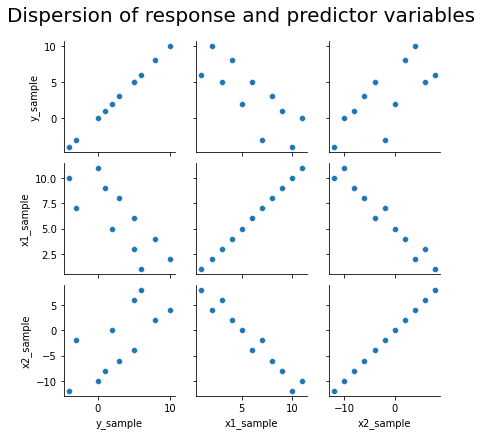

In [74]:
# Plot scatter plot grid
g = sns.PairGrid(df_data)
g.map(sns.scatterplot)

# Figure settings
g.fig.set_size_inches(6,6)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Dispersion of response and predictor variables", fontsize=20)

# Show plot
plt.show()

## 2.5] Pruebas de hipótesis sobre los estimadores individuales
    - La variación de la variable respuesta (SS_T) está conformada por la variación explicada por el modelo 
    (SS_R) y la variación residual (SS_Res). Para probar la significancia del modelo conjunto se hace una 
    prueba de hipótesis sobre la fuente de la variación. El estadístico sigue una distribución F con (k, n-k-1) 
    grados de libertad. Si el estadístico F_0 es mayor al asociado a un cuantil con una significancia (alpha) 
    dada, se rechaza la hipótesis de que la fuente de variación son la misma.
    
        F_0 = (SS_R/k) / (SS_Res/(n-k-1)) = MS_R / MS_Res
        
            donde:
            SS_R: Regression sum of square. SS_R = [B]T [X]T [y] - 1/n*sum[i=1 to n](y_i)**2
        
    - Al añadir una una variable al modelo de regresión se espera que SS_R aumente, por lo que el modelo logre
    explicar más variación en la respuesta, por lo que surje naturalmente una pregunta: ¿qué variables tienen 
    mejor poder predictivo? De igual manera es posible que el añadir otra variable explicativa aumente SS_Res.
    
    - Para probar la significancia de cada variable por separado se pueden construir pruebas de hipótesis
    individuales para asegurarse que una variable Xj sea significativa, es decir que bj!=0. El estadístico de 
    prueba sigue una distirbución tStudent con (n-k-1) grados de libertad. La varianza del estimador se 
    calcula como:
    
        var(b_j) = s^^2 * [C_jj]
        
            donde:
            [C_jj]: Es el elemejto j de la diagonal de la matriz [C] = [[X]T [X]]^-1

In [75]:
# Calculate sources of variation
SS_T = n * y_sample.var(ddof=0)
SS_R = SS_T - SS_Res
MS_R = SS_R / (k)

# Calculate F0 statistic and compare it to test statistic
F_0 = MS_R / MS_Res
p_value = 1-f.cdf(F_0, k, n-k-1)
message = "IS" if p_value<0.05 else "IS NOT"
message = "The model that predicts Y with X1 and X2 {} significant".format(message)

# Compute C matrix
C = np.linalg.inv(X.T @ X)
B_std = (e_var_est * np.diag(C)) ** 0.5
B_confint = B[:,np.newaxis] + t.ppf([0.025,0.975], df=n-k-1) * B_std[:, np.newaxis]

# Display results
print("="*100+"\n\n{}".format(message)+"\np-value:{}".format(np.round(p_value,2))+"\n\n"+"="*100)
print("95% confidence intervals of coefficients:\n{}".format(np.round(B_confint,3))+"\n\n"+"="*100)


The model that predicts Y with X1 and X2 IS significant
p-value:0.02

95% confidence intervals of coefficients:
[[-0.055 28.055]
 [-4.764  0.764]
 [-1.882  0.882]]



## 2.6] Pruebas de hipótesis sobre conjuntos de estimadores

    - Se puede determinar la contribución, en términos de explicar la variación de Y, de un conjunto de 
    r variables (el conjunto puede contener solo a una), dado que ya se tiene un modelo con p-r variables 
    explicativas. Este método se llama "suma de cuadrados adicional".
    
    - El primero paso es dividir el vector [B] en dos conjuntos:
    
        [B] = stack([B1] [B2])
        
            donde: stack([] []) implica una apilación vertical
            [B]: Vector  (px1)
            [B1]: Vector (p-r), ya se tiene un modelo con estos coeficientes, al que se le agregará un nuevo 
                  conjunto
            [B2]: Vector (r), es para el que se probará su contribución a explicar la variació
            
    - Por lo tanto, el modelo se puede escribir como:
    
        [y] = [X][B] + [e] = [X1][B1] + [X2][B2] + [e]
        
    - Para calcular la aportación de [B2] dado un modelo que ya contiene [B1], se considera la expresión. Las 
    contribuciones se dan en términos de SS_R.
    
        SS_R([B2] | [B1]) = SS_R[B] - SS_R[B1]
        
            donde:
            SS_R[B]: Regression sum of square del modelo que contempla [B]
            SS_R[B1]: Regression sum of square del modelo que solo contempla las variables relacionadas a [B1]
            SS_R([B2] | [B1]): Square sum adicional al contemplar [B2] en un modelo que ya contempla [B1]
            
            observe que:
            - El método ayuda a calcular la contribución marginal de incluir [B2]
            
    - Únicamente en el caso de que X1 y X2 sean ortogonales se tiene que:
    
        SS_R[B] = SS_R[B1] + SS_R[B2]

    - Adicionalmente, se puede hacer una prueba de hipótesis para conocer si [B2]!=0, utilizando la misma
    prueba mencionada anteriormente, ajustando por los grados de libertad adecuados.
    
        F_0 = (SS_R([B2] | [B1])/r) / (MS_Res)
        
            observe que:
            - Esta prueba nos ayuda a decidir si agregar un conjunto [B2] de variables explicativas es 
            significativo para el modelo o no.

In [76]:
# Calculate additional Res. Sq. Sum for X2 given X1
X_1 = np.vstack([X[:,0], X[:,1]]).T
B_1 = np.linalg.inv(X_1.T @ X_1) @ X_1.T @ y_sample
SS_R_1 = B_1.T @ X_1.T @ y_sample - (1/n)*y_sample.sum()**2
SS_R_2_1 = SS_T - SS_R_1

# Calculate additional Res. Sq. Sum. for X2 given X1
X_2 = np.vstack([X[:,0], X[:,2]]).T
B_2 = np.linalg.inv(X_2.T @ X_2) @ X_2.T @ y_sample
SS_R_2 = B_2.T @ X_2.T @ y_sample - (1/n)*y_sample.sum()**2
SS_R_1_2 = SS_T - SS_R_2

# Define which variable is more relevent in explaining Y
message = "X1" if SS_R_1_2 > SS_R_2_1 else "X2"
message = "{} contributes more in explaining the response".format(message)

# Hypothesis test for additional variables
F_0_1 = SS_R_1_2 / MS_Res
F_0_2 = SS_R_2_1 / MS_Res
p_value = np.round(1 - f.cdf([F_0_1, F_0_2], 1, n-k-1),3)


#Display output
print("="*100+"\n\n{}".format(message)+"\n\n"+"="*100)
print("Associated p-values:\n{}".format(p_value)+"\n\n"+"="*100)


X1 contributes more in explaining the response

Associated p-values:
[0.011 0.018]



## 2.7] Intervalos de estimación de la respuesta media y de predicción
    - Siguiendo la teoría del modelo de regresión lineal simple tenemos que para estimar un intervalo de 
    confianza para y^_0 (observación de la predicción media en el punto 0) se tiene que calcular la varianza. 
    Se sigue una distribución t con (n-p) grados de libertad
    
        Var[E(y_0 | [x_0])] = Var[y^_0] = s^^2 * [x_0]T  [[X]T [X]]^-1 [x_0]
        
            donde:
            [x_0]: Conjunto de k observaciones para el punto a estimar
            
            observe que:
            - Aunque no esté implícito, los CI son más cortos mientras más cercano se esté al centroide de los 
            datos. La velocidad con que se hacen más grandes los intervalos depende del modelo. Una forma de 
            comparar modelos es evaluar la longitud del IC.
            
    - Para el caso de predicciones puntuales se tiene que:
    
        Var(y^_0) = s^^2 * (1 + [x_0]T [[X]T [X]]^-1 [x_0])
        
            observe que:
            - Se añade una unidad de s^^2, por lo que se espera que sean más grandes que los de estimación de 
            la respuesta media.

In [145]:
# Compute variance for each observation
mean_response_var = []
for x1, x2 in zip(x1_sample, x2_sample):
    x0 = np.array([1, x1, x2])
    mean_response_var += [e_var_est * x0.T @ np.linalg.inv(X.T@X) @ x0]
mean_response_std = np.array(mean_response_var)**0.5

# Compute mean response for each observation
predict = X @ B

# Calculate confidence interval for each observation
mean_response_ci = predict.reshape(-1,1) + mean_response_std.reshape(-1,1) * t.ppf([0.025,0.975], df=n-p)

# Calculate prediction values
predict_var = []
for x1, x2 in zip(x1_sample, x2_sample):
    x0 = np.array([1, x1, x2])
    predict_var += [e_var_est * (1 + x0.T @ np.linalg.inv(X.T@X) @ x0)]
predict_std = np.array(predict_var)**0.5

predict_ci = predict.reshape(-1,1) + predict_std.reshape(-1,1) * t.ppf([0.025,0.975], df=n-p)

# Display results
print("For the point ({}, {}) the confidence intervals are:\n".format(x1_sample[0], x2_sample[0]),
      "\nObserved y: {}".format(y_sample[0]),
      "\n\nMean response:\n{}".format(mean_response_ci[0]),
      "\n\nPrediction:\n{}".format(predict_ci[0])
     )

For the point (1, 8) the confidence intervals are:
 
Observed y: 6 

Mean response:
[ 4.18898185 11.81101815] 

Prediction:
[ 0.27187426 15.72812574]


## 2.9] Cálculo con librerías
    - A continuación se ejecuta una librería para realizar los cálculos de manera automática y se presenta el
    output para su interpretación

In [80]:
# Mute warnings
warnings.filterwarnings("ignore", category=Warning)

# Fit and summarize OLS model
mod = sm.OLS(y_sample, sm.add_constant(df_data[["x1_sample","x2_sample"]], prepend=False))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7.176
Date:                Thu, 02 May 2024   Prob (F-statistic):             0.0164
Time:                        20:12:28   Log-Likelihood:                -25.627
No. Observations:                  11   AIC:                             57.25
Df Residuals:                       8   BIC:                             58.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1_sample     -2.0000      1.198     -1.669      0.1